In [3]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [4]:
#importar dados
dataset = pd.read_csv("Churn.csv", sep=";")
#visualizar dados
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [5]:
#Tamanho
dataset.shape

(999, 12)

In [6]:
#nome das colunas
dataset.columns = ["id", "Score", "Estado", "Genero", "Idade", "Patrimonio", "saldo", "Produtos", "TemCartCredito", "ativo", "salario", "Saiu"]

In [7]:
dataset.head()

,id,Score,Estado,Genero,Idade,Patrimonio,saldo,Produtos,TemCartCredito,ativo,salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [8]:
#explorar dados especificos
#estado
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

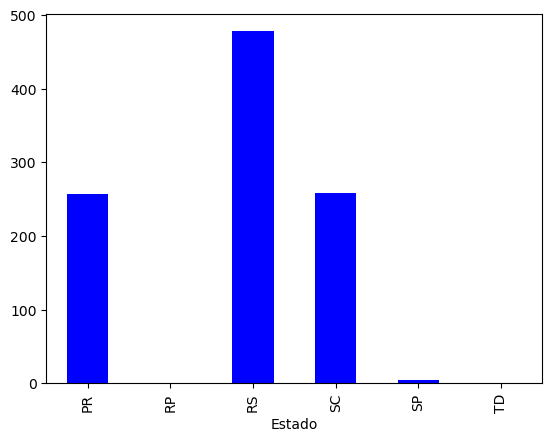

In [9]:
agrupado.plot.bar (color = 'Blue')

In [10]:
#genero
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Genero'>

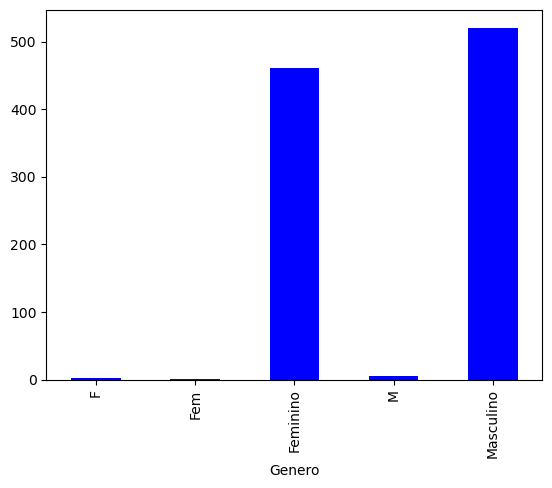

In [11]:
agrupado.plot.bar (color = 'Blue')

In [13]:
dataset['Score'].describe()


count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

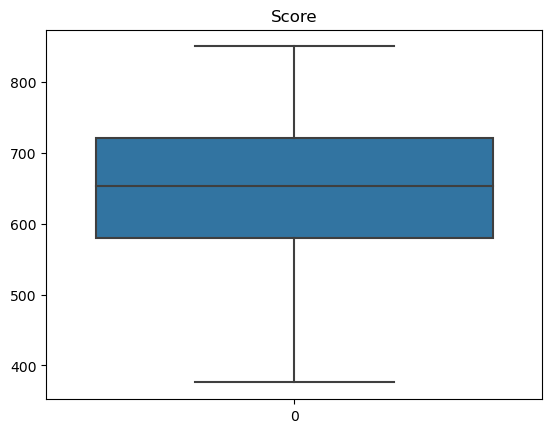

In [14]:
srn.boxplot(dataset['Score']).set_title('Score')

Text(0.5, 1.0, 'Score')

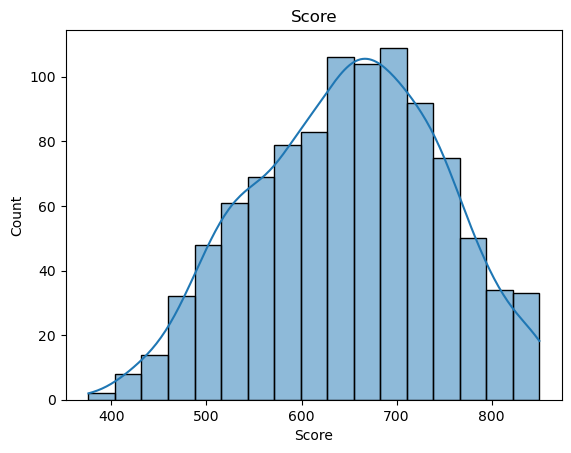

In [15]:
srn.histplot(dataset['Score'], kde=True).set_title('Score')

In [16]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

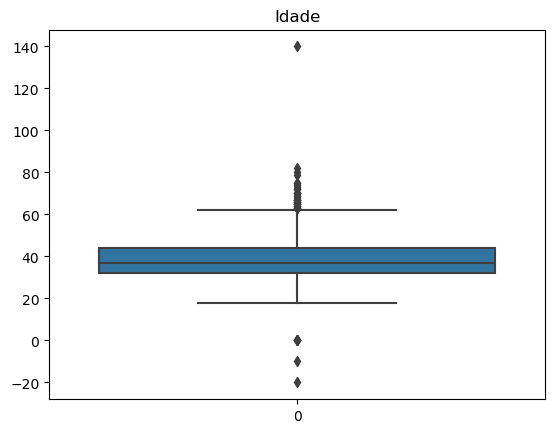

In [17]:
srn.boxplot(dataset['Idade']).set_title('Idade')

Text(0.5, 1.0, 'Idade')

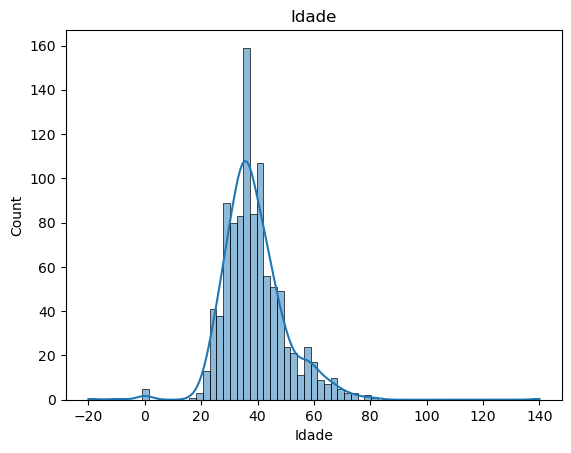

In [18]:
srn.histplot(dataset['Idade'], kde=True).set_title('Idade')

Text(0.5, 1.0, 'Idade')

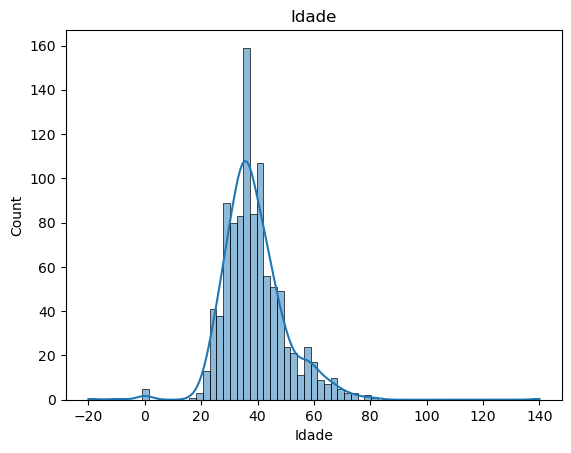

In [18]:
srn.histplot(dataset['Idade'], kde=True).set_title('Idade')

Text(0.5, 1.0, 'Idade')

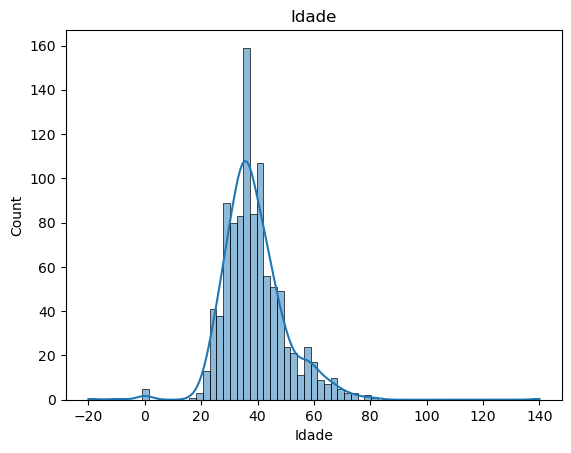

In [18]:
srn.histplot(dataset['Idade'], kde=True).set_title('Idade')

Text(0.5, 1.0, 'Salario')

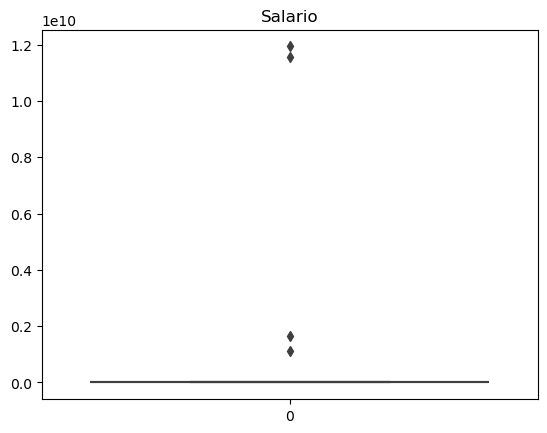

In [19]:
srn.boxplot(dataset['salario']).set_title('Salario')

Text(0.5, 1.0, 'Salario')

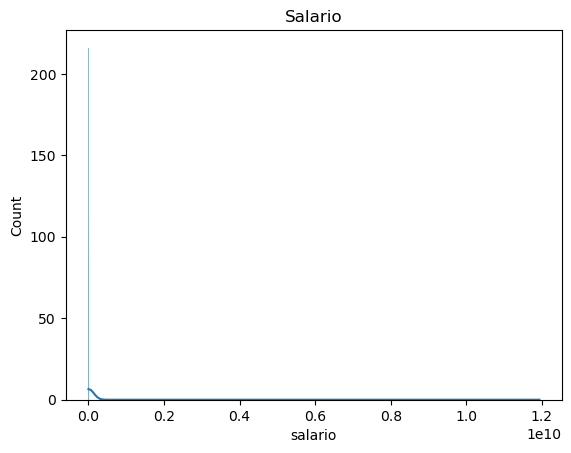

In [20]:
srn.histplot(dataset ['salario'], kde=True).set_title('Salario')

In [21]:
dataset.isnull().sum()


id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
saldo             0
Produtos          0
TemCartCredito    0
ativo             0
salario           7
Saiu              0
dtype: int64

In [22]:
dataset['salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: salario, dtype: float64

In [23]:
mediana = sts.median(dataset['salario'])
mediana

70518.0

In [24]:
dataset['salario'].fillna(mediana, inplace = True)

In [25]:
dataset['salario'].isnull().sum()

0

In [26]:
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [27]:
dataset['Genero'].isnull().sum()

8

In [28]:
dataset.fillna('Masculino', inplace=True)

In [29]:
dataset['Genero'].isnull().sum()

0

In [30]:
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = 'Masculino'
dataset.loc[dataset['Genero'].isin ( ['Fem', 'F']), 'Genero'] = "Feminino"
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [31]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [42]:
#visualizar
dataset.loc[(dataset['Idade'] < 18) | (dataset['Idade'] > 120)]

,id,Score,Estado,Genero,Idade,Patrimonio,saldo,Produtos,TemCartCredito,ativo,salario,Saiu
851,853,667,PR,Feminino,0,1,9713392,2,0,0,11331677.0,1
887,889,585,RS,Masculino,0,2,0,2,1,1,1865777.0,0
930,932,661,SC,Masculino,0,6,13262898,1,0,0,3881267.0,0
931,933,564,PR,Masculino,0,9,10352275,2,1,1,3433821.0,0
947,949,715,RS,Feminino,0,5,11859041,1,1,1,568417.0,1


In [38]:
#calcular mediana
mediana = sts.median(dataset['Idade'])
mediana

37

In [43]:
dataset.loc[(dataset['Idade'] < 18) | (dataset['Idade'] > 120), 'Idade'] = mediana

In [44]:
dataset.loc[(dataset['Idade'] < 18) | (dataset['Idade'] > 120)]

,id,Score,Estado,Genero,Idade,Patrimonio,saldo,Produtos,TemCartCredito,ativo,salario,Saiu


In [46]:
dataset[dataset.duplicated(['id'], keep=False)]

,id,Score,Estado,Genero,Idade,Patrimonio,saldo,Produtos,TemCartCredito,ativo,salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
867,70518,70518,70518.0,70518.0,37,70518,70518,70518,70518,70518,70518.0,70518
984,70518,70518,70518.0,70518.0,37,70518,70518,70518,70518,70518,70518.0,70518
990,70518,70518,70518.0,70518.0,37,70518,70518,70518,70518,70518,70518.0,70518


In [51]:
dataset.drop_duplicates(subset='id', keep='first', inplace= True)
dataset[dataset.duplicated(['id'], keep=False)]

,id,Score,Estado,Genero,Idade,Patrimonio,saldo,Produtos,TemCartCredito,ativo,salario,Saiu


In [53]:
agrupado = dataset.groupby(['Estado']).size()
agrupado


Estado
70518.0      1
PR         257
RP           1
RS         474
SC         258
SP           4
TD           1
dtype: int64

In [54]:
dataset.loc[dataset['Estado'].isin ( ['RP', 'SP', 'TD']), 'Estado'] = "RS"
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
70518.0      1
PR         257
RS         480
SC         258
dtype: int64

In [57]:
desv = sts.stdev(dataset['salario'])
desv

529519053.8226534

In [58]:
dataset.loc[dataset ['salario']>= 2*desv]

,id,Score,Estado,Genero,Idade,Patrimonio,saldo,Produtos,TemCartCredito,ativo,salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [59]:
mediana = sts.median(dataset['salario'])
mediana

8637195.5

In [60]:
dataset.loc[dataset ['salario']>= 2*desv] = mediana
dataset.loc[dataset ['salario']>= 2*desv]

,id,Score,Estado,Genero,Idade,Patrimonio,saldo,Produtos,TemCartCredito,ativo,salario,Saiu


In [62]:
dataset.head()

,id,Score,Estado,Genero,Idade,Patrimonio,saldo,Produtos,TemCartCredito,ativo,salario,Saiu
0,1.0,619.0,RS,Feminino,42.0,2.0,0.0,1.0,1.0,1.0,10134888.0,1.0
1,2.0,608.0,SC,Feminino,41.0,1.0,8380786.0,1.0,0.0,1.0,11254258.0,0.0
2,3.0,502.0,RS,Feminino,42.0,8.0,1596608.0,3.0,1.0,0.0,11393157.0,1.0
3,4.0,699.0,RS,Feminino,39.0,1.0,0.0,2.0,0.0,0.0,9382663.0,0.0
4,5.0,850.0,SC,Feminino,43.0,2.0,12551082.0,1.0,1.0,1.0,790841.0,0.0


In [63]:
dataset.shape

(996, 12)